# Data Modelling (Pseudo Plan)


### Data and Libraries

In [5]:
# load libraries
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split



In [6]:
# load preprocessed data from csv file
X_train_transformed = pd.read_csv('../data/X_train_transformed.csv')

## Unsupervised Clustering / EDA

First I will explore the data using unsupervised clustering.  This will help me to understand the data and the relationships between the variables.  It will also help me to understand the student profiles and whether there are any distinct groups of students.

### Biographical features only

In [7]:
biographical_cols = ['gender_F', 'gender_M', 'region_East Anglian Region', 'region_East Midlands Region', 'region_Ireland', 'region_London Region', 'region_North Region', 'region_North Western Region', 'region_Scotland', 'region_South East Region', 'region_South Region', 'region_South West Region', 'region_Wales', 'region_West Midlands Region', 'region_Yorkshire Region', 'disability_N', 'disability_Y', 'month_Feb', 'month_Oct', 'highest_education', 'imd_band', 'age_band']

X_demographic = X_train_transformed[biographical_cols]



In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# number of clusters
n_clusters = 5

# knn
kmeans = KMeans(n_clusters=n_clusters, random_state=567)

# fit knn X_demographic dataset
cluster_labels = kmeans.fit_predict(X_demographic)



/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:


# cluster centroids
centroids = kmeans.cluster_centers_
centroids

array([[0.49844065, 0.50155935, 0.03779123, 0.07283067, 0.03393873,
        0.15391671, 0.06274078, 0.16088791, 0.0820033 , 0.03137039,
        0.02623372, 0.04237755, 0.07484865, 0.1245643 , 0.09649606,
        0.87396808, 0.12603192, 0.39038708, 0.60961292, 1.60080719,
        0.5090809 , 0.25243075],
       [0.42485925, 0.57514075, 0.13642269, 0.07644002, 0.03118233,
        0.05543525, 0.02468601, 0.06279775, 0.12213079, 0.0877003 ,
        0.1147683 , 0.0931139 , 0.0645301 , 0.07384149, 0.05695106,
        0.92507579, 0.07492421, 0.36812473, 0.63187527, 1.77219576,
        6.50108272, 0.32914682],
       [0.39661256, 0.60338744, 0.15219948, 0.08209833, 0.02752294,
        0.04398965, 0.01364385, 0.04422489, 0.12820513, 0.08821454,
        0.2135968 , 0.06398494, 0.06304399, 0.04587156, 0.0334039 ,
        0.9266055 , 0.0733945 , 0.37544107, 0.62455893, 1.88967302,
        8.48459186, 0.34086097],
       [0.47710385, 0.52289615, 0.09175739, 0.07447728, 0.02401935,
        0.1470537

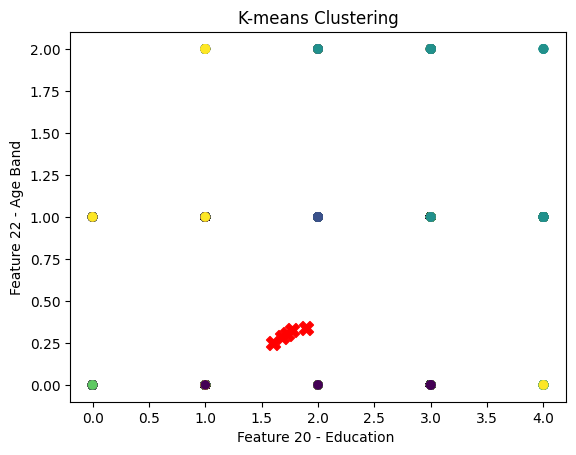

In [10]:

# cluster assignments
plt.scatter(X_demographic.iloc[:, 19], X_demographic.iloc[:, 21], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 19], centroids[:, 21], marker='X', color='red', s=100)
plt.xlabel('Feature 20 - Education ')
plt.ylabel('Feature 22 - Age Band')
plt.title('K-means Clustering')
plt.show()

Plotting the encoded features against the centroids is not particularly enlightening. 

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

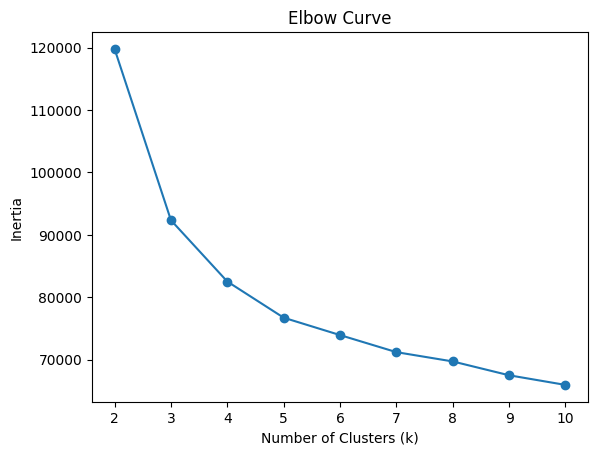

In [11]:
# store the inertia (sum of squared distances to the nearest centroid) for different values of k
inertia = []  

# values of k from 2 to 10
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=567)
    kmeans.fit(X_demographic)
    inertia.append(kmeans.inertia_)

#  elbow curve
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


Elbow curve shows the relationship between number of clusters (k) and the `inertia` - standard approach to identify the optimal number of clusters is to find the bend in the 'elbow' - that is where the inertia starts to level off (so, 5 probably)

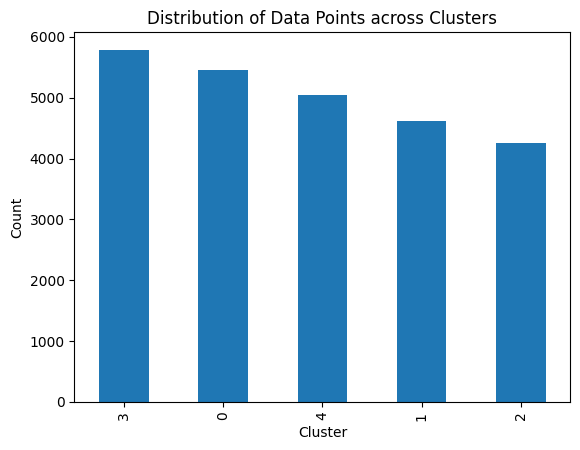

In [12]:
cluster_counts = pd.Series(cluster_labels).value_counts()
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Data Points across Clusters')
plt.show()


The clusters are fairly evenly distributed.  

Average feature values below.

In [13]:
centroid_df = pd.DataFrame(centroids, columns=X_demographic.columns)
print(centroid_df)


   gender_F  gender_M  region_East Anglian Region   
0  0.498441  0.501559                    0.037791  \
1  0.424859  0.575141                    0.136423   
2  0.396613  0.603387                    0.152199   
3  0.477104  0.522896                    0.091757   
4  0.474217  0.525783                    0.124950   

   region_East Midlands Region  region_Ireland  region_London Region   
0                     0.072831        0.033939              0.153917  \
1                     0.076440        0.031182              0.055435   
2                     0.082098        0.027523              0.043990   
3                     0.074477        0.024019              0.147054   
4                     0.072590        0.026775              0.090044   

   region_North Region  region_North Western Region  region_Scotland   
0             0.062741                     0.160888         0.082003  \
1             0.024686                     0.062798         0.122131   
2             0.013644          

The most obvious point to note is the average `imd_band` for the 5 clusters - there is a clear distinction between the groups.  Cluster 2 and 3 have fewer students who have declared a disability. Cluster 3 has more Male students than Female and there are differences between the student's region too. 

Not convinced that this is worth pursuing as currently structured.

Could think about grouping regions into fewer. 

Could think about bringing in modular data or other features. 

In [14]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_demographic, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")


Average Silhouette Score: 0.16750849498565068


Silhouette score of 0.17 is moderate for cluster separation - easier to interpret visually (below).  Score ranges form -1 to 1 where the higher values mean a better-defined group (silhoutte large which is distance between group for that observation).

We can see that cluster 3 and 5 are much better defined than the other three.

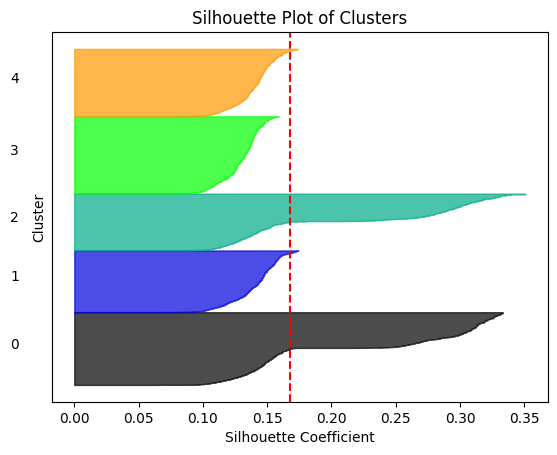

In [15]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np

# silhouette scores for each sample
silhouette_values = silhouette_samples(X_demographic, cluster_labels)

# scatter plot 
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    # aggregate the silhouette scores for samples in the current cluster
    cluster_silhouette_values = silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()

    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # colour map clusters
    colour = cm.nipy_spectral(float(i) / n_clusters)

    # fill silhouette plot
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                     facecolor=colour, edgecolor=colour, alpha=0.7)
    
    # check negative silhouette coefficients or overlapping clusters
    if np.any(cluster_silhouette_values < 0) or np.all(cluster_silhouette_values == 0):
        # highlight 
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                         facecolor='red', edgecolor='red', alpha=0.7)

    # label  with cluster numbers
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # new y_lower for next plot
    y_lower = y_upper + 10

ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')
ax.axvline(x=silhouette_avg, color='red', linestyle='--')
ax.set_yticks([])
ax.set_title('Silhouette Plot of Clusters')
plt.show()


### All Features

In [16]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25149 entries, 0 to 25148
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   highest_education            25149 non-null  float64
 1   imd_band                     25149 non-null  float64
 2   age_band                     25149 non-null  float64
 3   code_module_AAA              25149 non-null  bool   
 4   code_module_BBB              25149 non-null  bool   
 5   code_module_CCC              25149 non-null  bool   
 6   code_module_DDD              25149 non-null  bool   
 7   code_module_EEE              25149 non-null  bool   
 8   code_module_FFF              25149 non-null  bool   
 9   code_module_GGG              25149 non-null  bool   
 10  code_presentation_2013B      25149 non-null  bool   
 11  code_presentation_2013J      25149 non-null  bool   
 12  code_presentation_2014B      25149 non-null  bool   
 13  code_presentatio

In [17]:
#biographical_cols = ['gender_F', 'gender_M', 'region_East Anglian Region', 'region_East Midlands Region', 'region_Ireland', 'region_London Region', 'region_North Region', 'region_North Western Region', 'region_Scotland', 'region_South East Region', 'region_South Region', 'region_South West Region', 'region_Wales', 'region_West Midlands Region', 'region_Yorkshire Region', 'disability_N', 'disability_Y', 'month_Feb', 'month_Oct', 'highest_education', 'imd_band', 'age_band']

#X_demographic = X_train_transformed[biographical_cols]

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# number of clusters
n_clusters = 5

# knn
kmeans_all = KMeans(n_clusters=n_clusters, random_state=567)

# fit knn X_train_trans dataset
clusters_all = kmeans_all.fit_predict(X_train_transformed)



/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# cluster centroids
centroids_all = kmeans_all.cluster_centers_


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

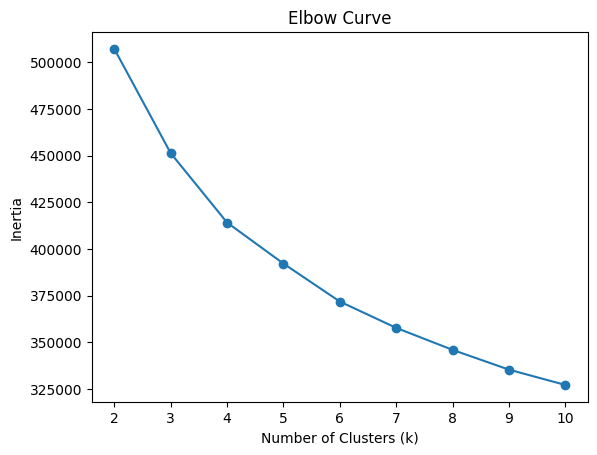

In [20]:
# store the inertia (sum of squared distances to the nearest centroid) for different values of k
inertia = []  

# values of k from 2 to 10
for k in range(2, 11):  
    kmeans_all = KMeans(n_clusters=k, random_state=567)
    kmeans_all.fit(X_train_transformed)
    inertia.append(kmeans_all.inertia_)

# elbow curve
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


With all variables - maybe 5 or 6 - but there's no clear bend in the elbow.

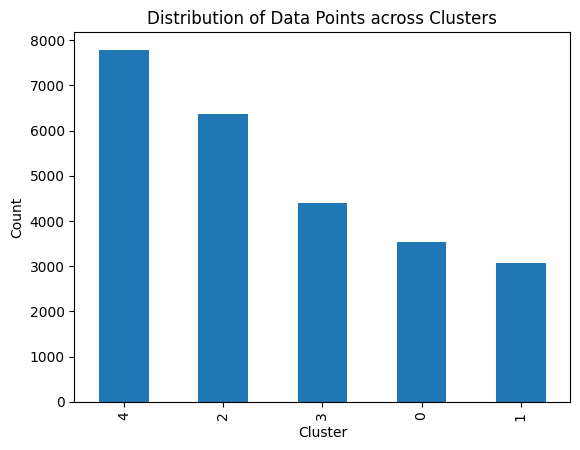

In [21]:
cluster_counts_all = pd.Series(clusters_all).value_counts()
cluster_counts_all.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Data Points across Clusters')
plt.show()


With all variables - there are different numbers of 'members' in each cluster - probably more reflective of reality.

In [22]:
centroid_df_all = pd.DataFrame(centroids_all, columns=X_train_transformed.columns)
print(centroid_df_all)


   highest_education  imd_band  age_band  code_module_AAA  code_module_BBB   
0           1.544990  2.049106  0.242975         0.005393         0.312234  \
1           1.815164  2.932965  0.358933         0.026359         0.081679   
2           1.884688  7.125353  0.350173         0.041575         0.226232   
3           1.688909  6.767479  0.284673         0.014803         0.207470   
4           1.662173  1.869543  0.267206         0.018233         0.327812   

   code_module_CCC  code_module_DDD  code_module_EEE  code_module_FFF   
0         0.163213         0.192733         0.080045         0.183934  \
1         0.073544         0.184510         0.084282         0.546046   
2         0.119234         0.207091         0.117509         0.197207   
3         0.205420         0.206559         0.077659         0.230699   
4         0.115562         0.172188         0.076528         0.169363   

   code_module_GGG  ...  date_registration  date_unregistration   
0         0.062447  ...  

In [23]:
X_train_transformed.columns

Index(['highest_education', 'imd_band', 'age_band', 'code_module_AAA',
       'code_module_BBB', 'code_module_CCC', 'code_module_DDD',
       'code_module_EEE', 'code_module_FFF', 'code_module_GGG',
       'code_presentation_2013B', 'code_presentation_2013J',
       'code_presentation_2014B', 'code_presentation_2014J', 'gender_F',
       'gender_M', 'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'disability_N', 'disability_Y', 'month_Feb', 'month_Oct',
       'subject_SocSci', 'subject_Stem', 'year_2013', 'year_2014',
       'num_of_prev_attempts', 'studied_credits', 'course_length',
       'date_registration', 'date_unregistration', 'prop_submissions',
       'avg_sc

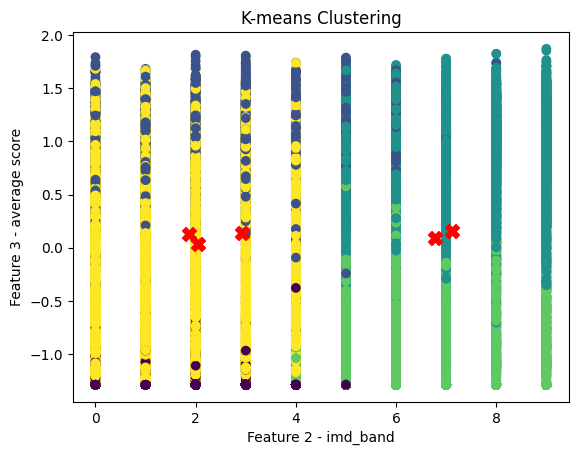

In [24]:

# cluster assignments
plt.scatter(X_train_transformed.iloc[:, 1], X_train_transformed.iloc[:, 43], c=clusters_all, cmap='viridis')
plt.scatter(centroids_all[:, 1], centroids[:, 2], marker='X', color='red', s=100)
plt.xlabel('Feature 2 - imd_band')
plt.ylabel('Feature 3 - average score')
plt.title('K-means Clustering')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

silhouette_avg_all = silhouette_score(X_train_transformed, clusters_all)
print(f"Average Silhouette Score: {silhouette_avg_all}")


Average Silhouette Score: 0.13565003279899177


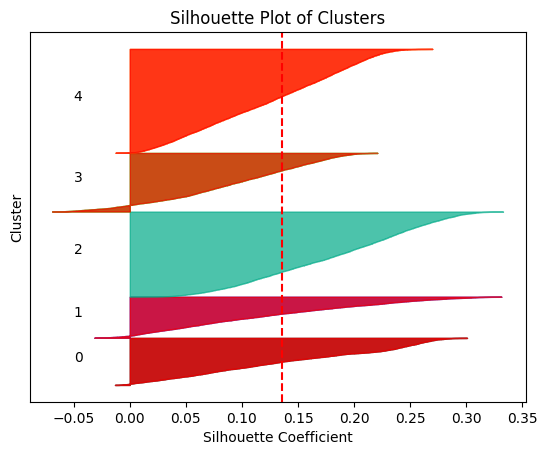

In [26]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np

# silhouette scores for each sample
silhouette_values_all = silhouette_samples(X_train_transformed, clusters_all)

# scatter plot 
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    # aggregate the silhouette scores for samples in the current cluster
    cluster_silhouette_values = silhouette_values_all[clusters_all == i]
    cluster_silhouette_values.sort()

    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # colour map clusters
    colour = cm.nipy_spectral(float(i) / n_clusters)

    # fill silhouette plot
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                     facecolor=colour, edgecolor=colour, alpha=0.7)
    
    # check negative silhouette coefficients or overlapping clusters
    if np.any(cluster_silhouette_values < 0) or np.all(cluster_silhouette_values == 0):
        # highlight 
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                         facecolor='red', edgecolor='red', alpha=0.7)

    # label  with cluster numbers
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # new y_lower for next plot
    y_lower = y_upper + 10

ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')
ax.axvline(x=silhouette_avg_all, color='red', linestyle='--')
ax.set_yticks([])
ax.set_title('Silhouette Plot of Clusters')
plt.show()


Using all variables - much worse clustering - overlapping, negative silhouette coefficients, only group 3 (2) is well defined.

### Other features

In [27]:
other_features = ['highest_education', 'imd_band', 'age_band','gender_F',
       'gender_M', 'disability_N', 'disability_Y', 'month_Feb', 'month_Oct',
       'subject_SocSci', 'subject_Stem', 'num_of_prev_attempts', 'studied_credits',
       'stu_activity_count', 'stu_total_clicks', 'stu_days_active']

The selection of features above are a combination of student background (education, age, gender, disability), student educational history (num_prev_attempts, studied_credits), curriculum (subject), delivery (intake month), and study behaviour (activity count, click counts, active days).  

I wonder whether this subset of features will improve clustering. 

In [28]:
X_other = X_train_transformed[other_features]

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# number of clusters
n_clusters = 5

# knn
kmeans_other = KMeans(n_clusters=n_clusters, random_state=567)

# fit knn X_other dataset
cluster_other = kmeans_other.fit_predict(X_other)



/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
# cluster centroids
centroids_other = kmeans_other.cluster_centers_
centroids_other

array([[ 1.93324775e+00,  7.02182285e+00,  4.67693624e-01,
         3.20068464e-01,  6.79931536e-01,  9.33247754e-01,
         6.67522465e-02,  3.46598203e-01,  6.53401797e-01,
         1.29653402e-01,  8.70346598e-01, -1.60335304e-01,
        -1.00913167e-01,  1.75553472e+00,  1.62115730e+00,
         1.70232989e+00],
       [ 1.69752714e+00,  3.96954162e+00,  2.84981906e-01,
         4.95174910e-01,  5.04825090e-01,  8.93848010e-01,
         1.06151990e-01,  3.84800965e-01,  6.15199035e-01,
         4.01688782e-01,  5.98311218e-01,  1.10377058e-02,
        -7.37135656e-03, -3.54874074e-01, -3.36218743e-01,
        -3.40190666e-01],
       [ 1.79338363e+00,  7.46952989e+00,  2.94979687e-01,
         4.38044109e-01,  5.61955891e-01,  9.22518862e-01,
         7.74811376e-02,  3.77248984e-01,  6.22751016e-01,
         3.63029600e-01,  6.36970400e-01,  3.07167411e-03,
        -3.50416286e-02, -3.35212590e-01, -3.23005820e-01,
        -3.01872094e-01],
       [ 1.59603960e+00,  9.95473833e

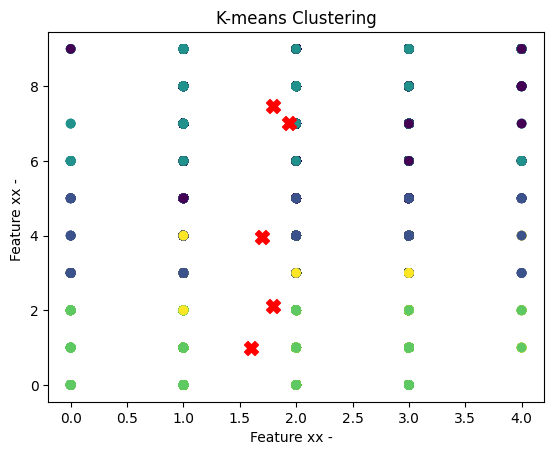

In [31]:

# cluster assignments
plt.scatter(X_other.iloc[:, 0], X_other.iloc[:, 1], c=cluster_other, cmap='viridis')
plt.scatter(centroids_other[:, 0], centroids_other[:, 1], marker='X', color='red', s=100)
plt.xlabel('Feature xx -  ')
plt.ylabel('Feature xx - ')
plt.title('K-means Clustering')
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

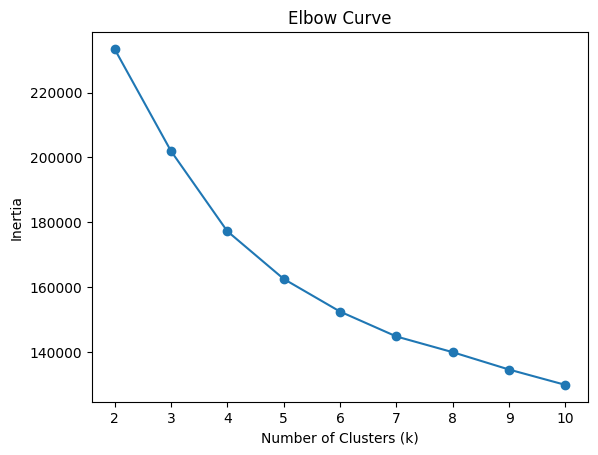

In [32]:
# store the inertia (sum of squared distances to the nearest centroid) for different values of k
inertia_other = []  

# values of k from 2 to 10
for k in range(2, 11):  
    kmeans_other = KMeans(n_clusters=k, random_state=567)
    kmeans_other.fit(X_other)
    inertia_other.append(kmeans_other.inertia_)

#  elbow curve
plt.plot(range(2, 11), inertia_other, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


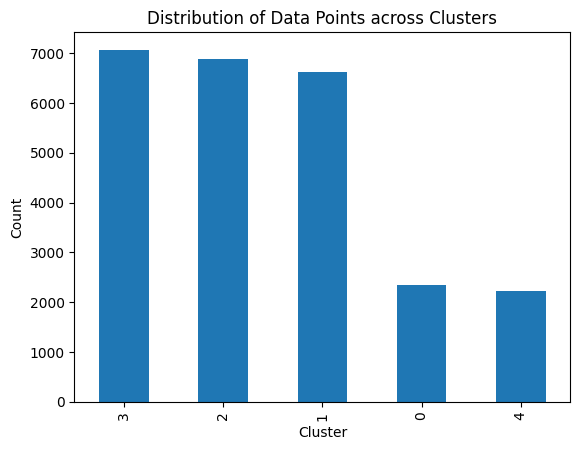

In [33]:
cluster_counts_other = pd.Series(cluster_other).value_counts()
cluster_counts_other.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Data Points across Clusters')
plt.show()


In [34]:
centroid_other_df = pd.DataFrame(centroids_other, columns=X_other.columns)
print(centroid_other_df)


   highest_education  imd_band  age_band  gender_F  gender_M  disability_N   
0           1.933248  7.021823  0.467694  0.320068  0.679932      0.933248  \
1           1.697527  3.969542  0.284982  0.495175  0.504825      0.893848   
2           1.793384  7.469530  0.294980  0.438044  0.561956      0.922519   
3           1.596040  0.995474  0.241018  0.528147  0.471853      0.869731   
4           1.792155  2.105951  0.361587  0.330027  0.669973      0.909378   

   disability_Y  month_Feb  month_Oct  subject_SocSci  subject_Stem   
0      0.066752   0.346598   0.653402        0.129653      0.870347  \
1      0.106152   0.384801   0.615199        0.401689      0.598311   
2      0.077481   0.377249   0.622751        0.363030      0.636970   
3      0.130269   0.397454   0.602546        0.433805      0.566195   
4      0.090622   0.394049   0.605951        0.132552      0.867448   

   num_of_prev_attempts  studied_credits  stu_activity_count   
0             -0.160335        -0.100913

These clusters are interesting:

* The counts are different - with more students in 'profiles' 2, 3, 4
* Profiles 2, 3, 4:
    * similar in age_band
    * proportionately more Female students in comparison to profiles 1, 5
    * proportionately more 'Social Science' students
    * more students have previously attempted studies than in clusters 1, 5
    * less engagement in terms of count of activities
    * less engagement in terms of total click count
    * less engagement in terms of count of days active




Investigation into student profile clusters may be worth pursuing as a form of dimension reduction.